In [10]:
import numpy as np
i = 10
a = np.zeros(shape=(i,i))
a

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
stations = [0,65,93,36]
points = []
for s in stations:
    s = str(s)
    if len(s)==1:
        s = s*2
    points.append((int(s[0]),int(s[1])))
    
print(points)

[(0, 0), (6, 5), (9, 3), (3, 6)]


In [13]:
def setPoints(points, a):
    i = 1
    for x,y in points:
        a[x][y] = i
        i+=1
    return a

In [15]:
m = setPoints(points,a)
m

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 4., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 3., 0., 0., 0., 0., 0., 0.]])

In [16]:
import itertools
from scipy.spatial.distance import cdist

m = np.asarray(m, dtype=np.int) 
n = m.max()
indexes = []
for k in range(1, n+1):
    tmp = np.nonzero(m == k)
    tmp = np.asarray(tmp).T
    indexes.append(tmp)

In [17]:
indexes

[array([[0, 0]]), array([[6, 5]]), array([[9, 3]]), array([[3, 6]])]

In [21]:
dist = []
for cur, nxt in _get_cur_next(indexes):
    d2 = cdist(cur, nxt, metric='cityblock')
    dist.append((cur, next, d2))

ValueError: XB must be a 2-dimensional array.

In [143]:
distance_matrix

array([[ 0., 11., 12.,  9.],
       [11.,  0.,  5.,  4.],
       [12.,  5.,  0.,  9.],
       [ 9.,  4.,  9.,  0.]])

In [121]:
labels_i, labels_j = np.meshgrid( range(1, n+1), range(1, n+1))  
results = np.dstack((labels_i, labels_j, distance_matrix)).reshape((-1, 3))
print(results)

[[ 1.  1.  0.]
 [ 2.  1. 11.]
 [ 3.  1. 12.]
 [ 4.  1.  9.]
 [ 1.  2. 11.]
 [ 2.  2.  0.]
 [ 3.  2.  5.]
 [ 4.  2.  4.]
 [ 1.  3. 12.]
 [ 2.  3.  5.]
 [ 3.  3.  0.]
 [ 4.  3.  9.]
 [ 1.  4.  9.]
 [ 2.  4.  4.]
 [ 3.  4.  9.]
 [ 4.  4.  0.]]


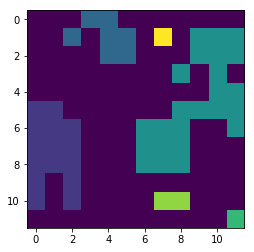

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Sample study area array
example_array = np.array([[0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 2, 0, 2, 2, 0, 6, 0, 3, 3, 3],
                          [0, 0, 0, 0, 2, 2, 0, 0, 0, 3, 3, 3],
                          [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0],
                          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3],
                          [1, 1, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3],
                          [1, 1, 1, 0, 0, 0, 3, 3, 3, 0, 0, 3],
                          [1, 1, 1, 0, 0, 0, 3, 3, 3, 0, 0, 0],
                          [1, 1, 1, 0, 0, 0, 3, 3, 3, 0, 0, 0],
                          [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                          [1, 0, 1, 0, 0, 0, 0, 5, 5, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]])

# Plot array
plt.imshow(example_array,  interpolation='nearest')

In [24]:
import itertools
from scipy.spatial.distance import cdist


In [27]:

# making sure that IDs are integer
example_array = np.asarray(example_array, dtype=np.int) 
# we assume that IDs start from 1, so we have n-1 unique IDs between 1 and n
n = example_array.max()

array([[0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 2, 2, 0, 6, 0, 3, 3, 3],
       [0, 0, 0, 0, 2, 2, 0, 0, 0, 3, 3, 3],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3],
       [1, 1, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3],
       [1, 1, 1, 0, 0, 0, 3, 3, 3, 0, 0, 3],
       [1, 1, 1, 0, 0, 0, 3, 3, 3, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 3, 3, 3, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 5, 5, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]])

In [ ]:

indexes = []
for k in range(1, n):
    tmp = np.nonzero(example_array == k)
    tmp = np.asarray(tmp).T
    indexes.append(tmp)


In [28]:
indexes

[array([[0, 0]]), array([[6, 5]]), array([[9, 3]]), array([[3, 6]])]

In [181]:
for i in indexes:
    print(i.shape, i)
    break

(15, 2) [[ 5  0]
 [ 5  1]
 [ 6  0]
 [ 6  1]
 [ 6  2]
 [ 7  0]
 [ 7  1]
 [ 7  2]
 [ 8  0]
 [ 8  1]
 [ 8  2]
 [ 9  0]
 [ 9  2]
 [10  0]
 [10  2]]


In [ ]:

# calculating the distance matrix
distance_matrix = np.zeros((n-1, n-1), dtype=np.float)   
for i, j in itertools.combinations(range(n-1), 2):
    # use squared Euclidean distance (more efficient), and take the square root only of the single element we are interested in.
    d2 = cdist(indexes[i], indexes[j], metric='sqeuclidean') 
    distance_matrix[i, j] = distance_matrix[j, i] = d2.min()**0.5

# mapping the distance matrix to labeled IDs (could be improved/extended)
labels_i, labels_j = np.meshgrid( range(1, n), range(1, n))  
results = np.dstack((labels_i, labels_j, distance_matrix)).reshape((-1, 3))

print(distance_matrix)
print(results)

In [126]:
list()


[(array([[0, 0]]), array([[6, 5]])),
 (array([[6, 5]]), array([[9, 3]])),
 (array([[9, 3]]), array([[3, 6]])),
 (array([[3, 6]]), None)]

In [114]:
distance_matrix

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [113]:
distance_matrix = np.zeros((n, n), dtype=np.float)   

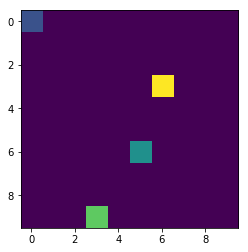

In [55]:
plt.imshow(example_array, interpolation='nearest')